# Neighborhood Employment Submetric  
### CMPINF 0010 – Final Project: Best Neighborhood in Pittsburgh  
**Author:** Nate Moser  

This notebook analyzes employment levels across Pittsburgh neighborhoods using data from the Western Pennsylvania Regional Data Center (WPRDC). It represents my individual “employment” submetric for determining the best neighborhood in Pittsburgh.

Employment reflects economic strength, job access, and general workforce participation. Neighborhoods with more employed residents often have stronger local economies, more stability, and better access to opportunity. My goal in this notebook is to quantify employment and identify which neighborhood performs best according to this specific metric.



## Dataset Description

The dataset used in this analysis comes from WPRDC’s *Pittsburgh American Community Survey: Sex by Occupation for the Civilian Employed Population (2018–2022)*.

Each row corresponds to one Pittsburgh neighborhood.  
Columns include:
- The total employed civilian population (age 16+)
- Employed males
- Employed females
- Occupational categories (e.g., management, service, construction, production)

For my employment metric, I focus on:

- **“Estimate; Total:”** → total number of employed civilians  
- **“Estimate; Male:”**  
- **“Estimate; Female:”**

These columns allow me to measure how many people are working in each neighborhood.


In [22]:
import pandas as pd

df = pd.read_csv("sex-by-occupation-for-the-civilian-employed-population-16-years-and-over.csv")
df.head()


,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Male:,Margin of Error; Male:,"Estimate; Male: - Management, business, science, and arts occupations:","Margin of Error; Male: - Management, business, science, and arts occupations:","Estimate; Male: - Management, business, science, and arts occupations: - Management, business, and financial occupations:","Margin of Error; Male: - Management, business, science, and arts occupations: - Management, business, and financial occupations:",...,"Estimate; Female: - Natural resources, construction, and maintenance occupations: - Installation, maintenance, and repair occupations","Margin of Error; Female: - Natural resources, construction, and maintenance occupations: - Installation, maintenance, and repair occupations","Estimate; Female: - Production, transportation, and material moving occupations:","Margin of Error; Female: - Production, transportation, and material moving occupations:","Estimate; Female: - Production, transportation, and material moving occupations: - Production occupations","Margin of Error; Female: - Production, transportation, and material moving occupations: - Production occupations","Estimate; Female: - Production, transportation, and material moving occupations: - Transportation occupations","Margin of Error; Female: - Production, transportation, and material moving occupations: - Transportation occupations","Estimate; Female: - Production, transportation, and material moving occupations: - Material moving occupations","Margin of Error; Female: - Production, transportation, and material moving occupations: - Material moving occupations"
0,Allegheny Center,1,579.0,131.000000,377.0,112.000000,232.0,91.000000,56.0,31.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
1,Allegheny West,2,221.0,80.000000,133.0,50.000000,52.0,31.000000,12.0,12.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
2,Allentown,3,841.0,170.064694,283.0,100.742245,65.0,56.603887,39.0,53.888774,...,11.0,22.891046,30.0,32.634338,5.0,17.320508,10.0,22.113344,15.0,28.722813
3,Arlington,4,991.0,207.465660,480.0,127.039364,54.0,43.977267,5.0,16.763055,...,0.0,17.320508,41.0,37.148351,30.0,32.939338,11.0,22.113344,0.0,17.320508
4,Arlington Heights,5,80.0,57.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


## Selecting Employment Columns

To create a clear and interpretable metric, I extract the following columns:

- Neighborhood name  
- Total employed residents  
- Employed males  
- Employed females  

I also renamed the columns to simpler, cleaner names.


In [27]:
df_employment = df[[
    "Neighborhood",
    "Estimate; Total:",
    "Estimate; Male:",
    "Estimate; Female:"
]].copy()

df_employment = df_employment.rename(columns={
    "Estimate; Total:": "Employed_Total",
    "Estimate; Male:": "Employed_Male",
    "Estimate; Female:": "Employed_Female"
})

df_employment.head()


,Neighborhood,Employed_Total,Employed_Male,Employed_Female
0,Allegheny Center,579.0,377.0,202.0
1,Allegheny West,221.0,133.0,88.0
2,Allentown,841.0,283.0,558.0
3,Arlington,991.0,480.0,511.0
4,Arlington Heights,80.0,0.0,80.0


## Employment Metric

My employment metric is defined as:

### **employment_score = total number of employed residents in a neighborhood**

I treat neighborhoods with higher total employment as economically stronger and more stable. More employed adults generally means:
- more income flowing into the community  
- better access to jobs  
- stronger local services and tax bases  

This metric does not control for neighborhood population size or labor force participation rate, but it still captures meaningful differences in economic activity across neighborhoods.


In [30]:
ranked = df_employment.sort_values(by="Employed_Total", ascending=False)
ranked.head(10)


,Neighborhood,Employed_Total,Employed_Male,Employed_Female
68,Shadyside,8223.0,4238.0,3985.0
77,Squirrel Hill South,7965.0,4416.0,3549.0
13,Brookline,6937.0,3205.0,3732.0
76,Squirrel Hill North,5537.0,2997.0,2540.0
9,Bloomfield,5484.0,2847.0,2637.0
53,Mount Washington,4973.0,2672.0,2301.0
15,Carrick,4443.0,2227.0,2216.0
72,South Side Flats,4396.0,2449.0,1947.0
36,Greenfield,4373.0,2147.0,2226.0
7,Beechview,4046.0,2300.0,1746.0


## Top 10 Neighborhoods by Employment

The bar chart below shows which neighborhoods have the highest number of working residents. These neighborhoods score highest on my employment metric.


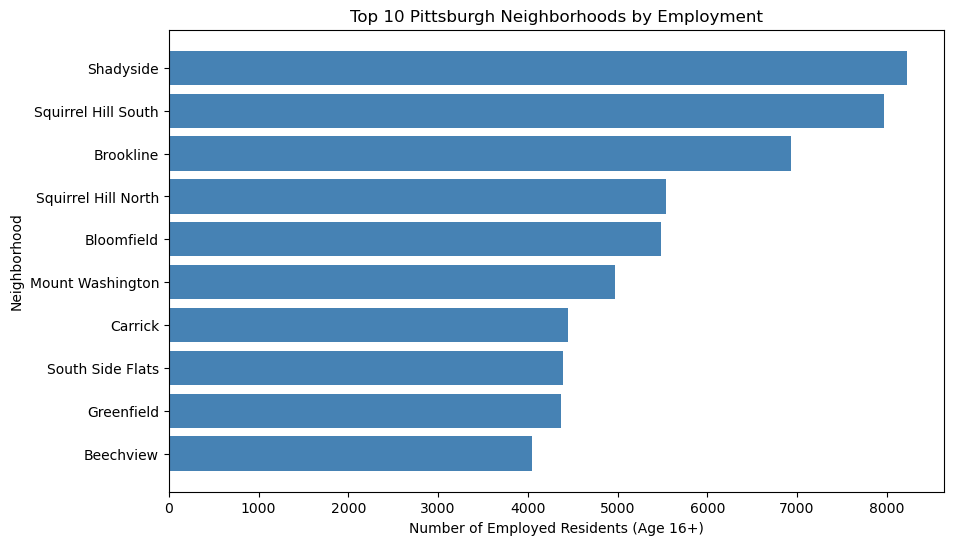

In [33]:
import matplotlib.pyplot as plt

top10 = ranked.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10["Neighborhood"], top10["Employed_Total"], color="steelblue")
plt.xlabel("Number of Employed Residents (Age 16+)")
plt.ylabel("Neighborhood")
plt.title("Top 10 Pittsburgh Neighborhoods by Employment")
plt.gca().invert_yaxis()
plt.show()


## Best Neighborhood According to Employment

The neighborhood with the highest number of employed residents is shown below.


In [38]:
best_neighborhood = ranked.iloc[0]["Neighborhood"]
best_employment = ranked.iloc[0]["Employed_Total"]
best_neighborhood, best_employment


('Shadyside', 8223.0)

### Interpretation

Based on this dataset, **the best neighborhood by employment is the one with the highest total number of employed civilians age 16 and over.**

This neighborhood has the strongest employment base, which suggests:
- greater local economic activity  
- more workforce stability  
- potentially more resources and services  

This employment submetric will later be combined with:
- school enrollment (education)  
- median age of death (health)  

to form our group’s overall best-neighborhood score.


In [41]:
scores = ranked[["Neighborhood", "Employed_Total"]].rename(
    columns={"Employed_Total": "employment_score"}
)

scores.to_csv("employment_scores.csv", index=False)
scores.head()


,Neighborhood,employment_score
68,Shadyside,8223.0
77,Squirrel Hill South,7965.0
13,Brookline,6937.0
76,Squirrel Hill North,5537.0
9,Bloomfield,5484.0


## Conclusion / Reflection

This analysis helped me understand Pittsburgh’s employment distribution at the neighborhood level. Neighborhoods with strong employment numbers often reflect higher economic stability and more job availability. While this metric does not adjust for population size or unemployment rates, it still provides a valuable perspective on economic conditions across Pittsburgh.

Employment alone cannot determine the “best” neighborhood, but it plays an important role in a community’s overall well-being. This metric will contribute to our group’s combined analysis alongside school enrollment (education) and median age of death (health).
